# Code for figure 4

This code was used for the analysis presented in  
"Do higher-order interactions promote synchronization?"  
by Yuanzhao Zhang, Maxime Lucas, and Federico Battiston

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import utils as hu

sb.set_context("paper")
sb.set_theme(style="ticks")

# Fig. 4: Higher-order interactions decrease degree heterogeneity in random hypergraphs

In [18]:
# load if already computed 
with np.load('figure_4_data.npz') as data:
    size = data['size']
    heterogeneity = data['heterogeneity']
    heterogeneity2 = data['heterogeneity2']

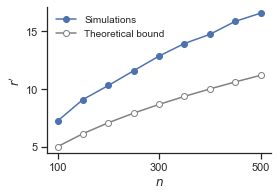

In [21]:
fig, ax = plt.subplots(figsize=(4, 2.7))

ax.set_xlabel(r'$n$')
# ax.set_ylabel(r"$h^{(1)} / h^{(2)}$")
ax.set_ylabel(r"$r'$")

ax.plot(size, heterogeneity/heterogeneity2, marker='o', c='b', label="Simulations")
ax.plot(size, np.sqrt(size)/2, marker='o', c="grey", mfc="white", label='Theoretical bound')

ax.set_yticks([5, 10, 15])
ax.set_xticks([100, 300, 500])

ax.legend(loc='upper left', frameon=False, fontsize='small')

sb.despine()

fig_name = f"figure_4"
# plt.savefig(f"{fig_name}.pdf", dpi=250, bbox_inches="tight")

plt.show()

In [19]:
# if not already computed, compute
# can take a bit of time
## compute the expected values of min and max degrees using both simulations and theory

size = np.arange(100, 501, 50)
K = np.zeros((8,9))
sample = 500
for j in range(9):
    # generate min and max degrees numerically to compare with theory
    K_min = np.zeros(sample)
    K_max = np.zeros(sample)

    K_min_2 = np.zeros(sample)
    K_max_2 = np.zeros(sample)

    N = size[j] # number of nodes
    ps = [.1, .1] # ps[i] is the wiring probability of any i+2 nodes (ps[0] is for edges, e.g.)
    alpha = 0.5
    rescale = True

    for i in range(sample):
    
        # generate hyperedges 
        hyperedges_random = hu.random_hypergraph(N, ps)
        L1, L2, L12, K1, K2 = hu.compute_laplacians_resource_constrained(hyperedges_random, N, alpha=alpha, return_k=True) # L12 is the multiorder one
        #lyap_1, lyap_2, lyap_12 = compute_eigenvalues_resource_constrained(hyperedges_random, N, alpha=alpha)
    
        K_min[i] = np.min(K1)
        K_max[i] = np.max(K1)
        K_min_2[i] = np.min(K2)
        K_max_2[i] = np.max(K2)
    
    K[0,j] = np.mean(K_min)
    K[1,j] = np.mean(K_max)
    K[2,j] = np.mean(K_min_2)
    K[3,j] = np.mean(K_max_2)
    
    p = .1
    q = 1-p
    # x is the max degree and z is the cumulative distribution, formula according to Bollobas 1980
    # distribution for the min degree can be obtained using symmetry
    y0 = .52
    x0 = p*N+np.sqrt(2*p*q*N*np.log(N))*(1-np.log(np.log(N))/4/np.log(N)-np.log(2*np.sqrt(np.pi))/2/np.log(N)+y0/2/np.log(N))

    K[4,j] = 2*p*N-x0
    K[5,j] = x0
    
    N_2 = (N-2)*(N-1)/2
    x0 = p*N_2+np.sqrt(2*p*q*N_2*np.log(N_2))*(1-np.log(np.log(N_2))/4/np.log(N_2)-np.log(2*np.sqrt(np.pi))/2/np.log(N_2)+y0/2/np.log(N_2))
    K[6,j] = 2*p*N_2-x0
    K[7,j] = x0

In [20]:
## compute the degree heterogeneity index
heterogeneity = (K[1,:]-p*size)/(p*size)
heterogeneity2 = (K[3,:]-p*(size-1)*(size-2)/2)/(p*(size-1)*(size-2)/2)

In [ ]:
np.savez("figure_4_data.npz", size=size, heterogeneity=heterogeneity, heterogeneity2=heterogeneity2)